In [1]:
######### PROJECT : k-means clustering ############

''' We will learn how to perform k-means clustering using scikit-learn in Python.
 We will use cluster analysis to generate a big picture model of the weather at a 
local station using a minute-graunlarity data. 
In this dataset, we have in the order of millions records. How do we create 12 clusters our of them?'''

#Importing the Necessary Libraries 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import pandas as pd 
import numpy as np 
from itertools import cycle, islice 
import matplotlib.pyplot as plt 
from pandas.plotting import parallel_coordinates 
#Creating a Pandas DataFrame from a CSV file 
data = pd.read_csv('data/weather.zip',compression = 'zip') 
print("Data Shape: ",data.shape) 
print("Sample Data: \n",data.head())

Data Shape:  (1587257, 13)
Sample Data: 
    rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1      1  2011-09-10 00:01:49         912.3     63.86               161.0   
2      2  2011-09-10 00:02:49         912.3     64.22                77.0   
3      3  2011-09-10 00:03:49         912.3     64.40                89.0   
4      4  2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumula

In [2]:
'''Minute Weather Data Description
 The minute weather dataset comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file minute_weather.csv, which is a comma-separated file.
 As with the daily weather data, this data comes from a weather station. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.
 Each row in minute_weather.csv contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:
o rowID: unique number for each row (Unit: NA)
o hpwren_timestamp: timestamp of measure (Unit: year-month-day hour:minute:second)
o air_pressure: air pressure measured at the timestamp (Unit: hectopascals)
o air_temp: air temperature measure at the timestamp (Unit: degrees Fahrenheit)
o avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)
o avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)
o max_wind_direction: highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and increasing clockwise)
o max_wind_speed: highest wind speed in the minute before the timestamp (Unit: meters per second)
o min_wind_direction: smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and inceasing clockwise)
o min_wind_speed: smallest wind speed in the minute before the timestamp (Unit: meters per second)
o rain_accumulation: amount of accumulated rain measured at the timestamp (Unit: millimeters)
o rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)
o relative_humidity: relative humidity measured at the timestamp (Unit: percent)'''


###Data Sampling 
#Lots of rows, so let us sample down by taking every 10th row. 
sampled_df = data[(data['rowID'] % 10) == 0] 
print("Sample Data Shape: ",sampled_df.shape) 
#Statistics 
sampled_df.describe().transpose() 
sampled_df[sampled_df['rain_accumulation'] == 0].shape 
sampled_df[sampled_df['rain_duration'] == 0].shape
#Drop all the Rows with Empty rain_duration and rain_accumulation 
del sampled_df['rain_accumulation'] 
del sampled_df['rain_duration'] 
rows_before = sampled_df.shape[0] 
sampled_df = sampled_df.dropna() 
rows_after = sampled_df.shape[0]

Sample Data Shape:  (158726, 13)


In [3]:
#How many rows did we drop ?
print("How many rows did we drop ? ",rows_before - rows_after) 
print("Columns in Sample Data: ",sampled_df.columns) 
#Select Features of Interest for Clustering 
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
            'max_wind_speed','relative_humidity'] 
select_df = sampled_df[features] 
select_df.columns 
select_df 
#Scale the Features using StandardScaler 
X = StandardScaler().fit_transform(select_df) 
X 
#Use k-Means Clustering 
kmeans = KMeans(n_clusters=12) 
model = kmeans.fit(X) 
print("model\n", model) 
#What are the centers of 12 clusters we formed ? 
centers = model.cluster_centers_ 
print("centers: ", centers) 
###Plots 
#Let us first create some utility functions which will help us in plotting graphs: 
# Function that creates a DataFrame with a column for Cluster Number 
def pd_centers(featuresUsed, centers): 
    colNames = list(featuresUsed) 
    colNames.append('prediction') 
    # Zip with a column called 'prediction' (index) 
    Z = [np.append(A, index) for index, A in enumerate(centers)] 
    # Convert to pandas data frame for plotting 
    P = pd.DataFrame(Z, columns=colNames) 
    P['prediction'] = P['prediction'].astype(int) 
    return P 
# Function that creates Parallel Plots 
def parallel_plot(data): 
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data))) 
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3]) 
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o') 
    plt.show() 
P = pd_centers(features, centers)
print("pd_centers: ",P)

How many rows did we drop ?  46
Columns in Sample Data:  Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')
model
 KMeans(n_clusters=12)
centers:  [[-0.68307105  0.5600558   0.17963819 -0.5874371   0.3498582  -0.60059378
  -0.12567847]
 [-0.84536142 -1.19592004  0.3748682   0.33883784  0.47300186  0.32688376
   1.36217354]
 [-0.21403362  0.62990467  0.40829251  0.7357603   0.51635634  0.67360469
  -0.14785664]
 [ 1.37069849 -0.0841825  -1.20708819 -0.04244163 -1.0762784  -0.02176082
  -0.97812011]
 [-0.15946331  0.86162061 -1.31076418 -0.59008414 -1.16636528 -0.60536474
  -0.64355148]
 [ 0.7455052   0.41683204  0.28749919 -0.52849546  0.47465304 -0.53490547
  -0.77508598]
 [ 0.05905777 -0.78536387 -1.19624004 -0.57052628 -1.04222801 -0.58498187
   0.87653693]
 [ 0.26120733 -0.99302771  0.662

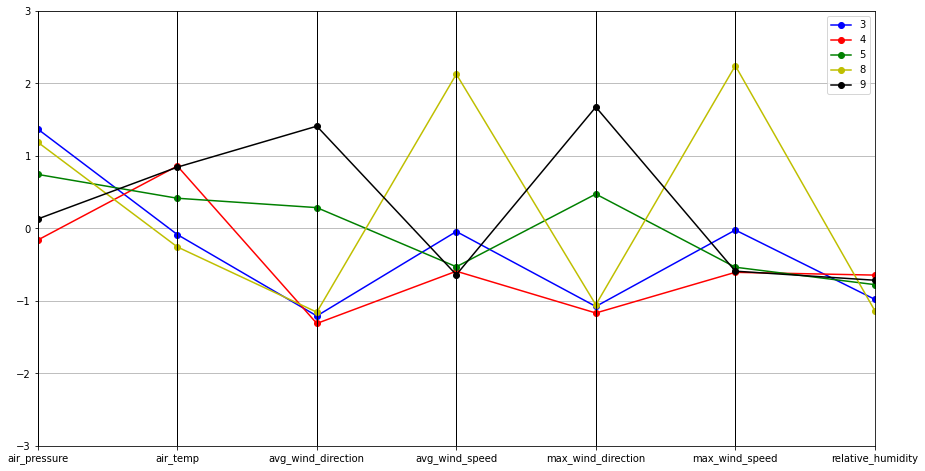

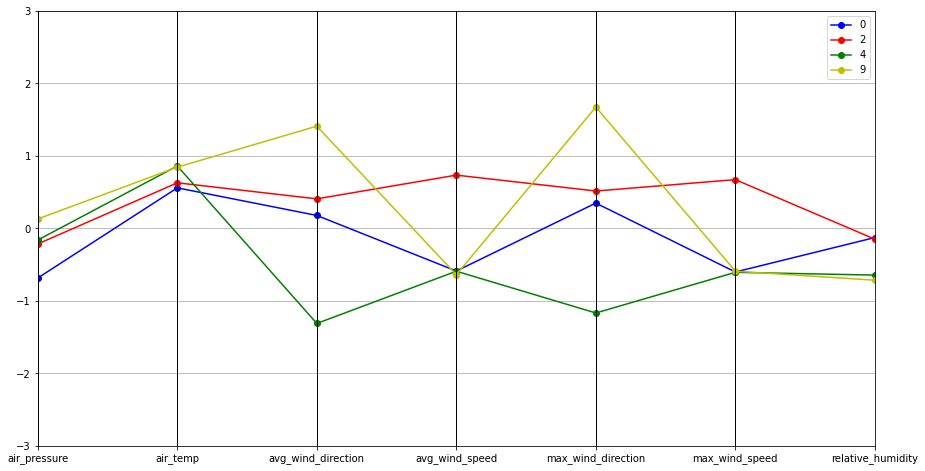

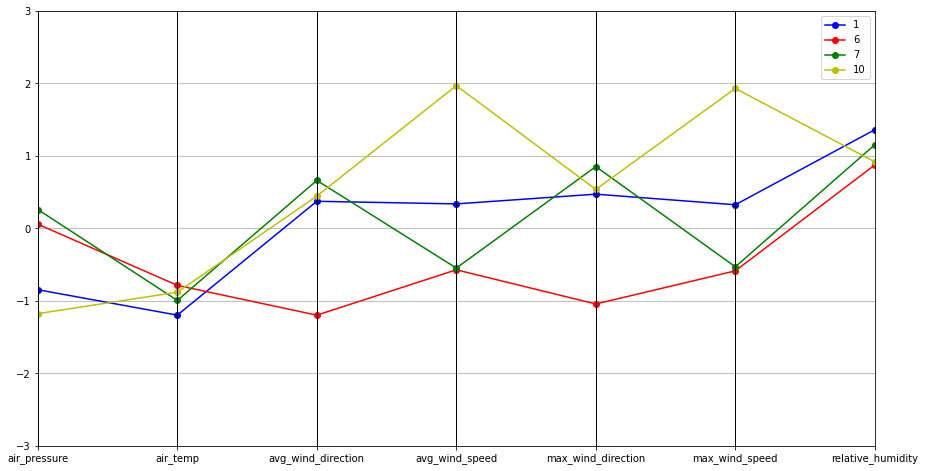

In [4]:
#### OUTPUT ####

###Dry Days 
parallel_plot(P[P['relative_humidity'] < -0.5]) 
###Warm Days 
parallel_plot(P[P['air_temp'] > 0.5]) 
###Cool Days 
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])